**SALES** **PREDICTION**

Sales prediction means predicting how much of a product people will buy based on factors such as the amount spend to advertise  product, the segment of people  advertise for, or the platform advertising on about product.

Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So lets start the task of sales prediction with machine learning using Python.

Importing the Dependencies

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Analysis

In [43]:
data=pd.read_csv("/content/Advertising.csv")#loading the dataset from csv file to a Pandas Dataframe

In [44]:
data.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [45]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [46]:
data.info

<bound method DataFrame.info of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

Analysis of the Data

In [47]:
#removing the unwanted column:
data.drop('Unnamed: 0',axis=1, inplace=True)
data.shape

(200, 4)

In [48]:
print(data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [49]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Numerical Features

<ipython-input-77-89d964456ffa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['TV'])


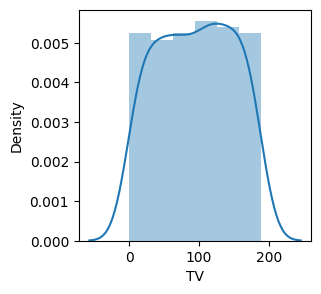

In [77]:
#TV advertisment
plt.figure(figsize=(3,3))
sns.distplot(data['TV'])
plt.show()

<ipython-input-78-5ab8e7185d42>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Radio'])


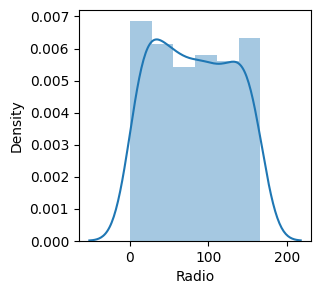

In [78]:
plt.figure(figsize=(3,3))
sns.distplot(data['Radio'])
plt.show()

<ipython-input-79-e92d66eda85b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Newspaper'])


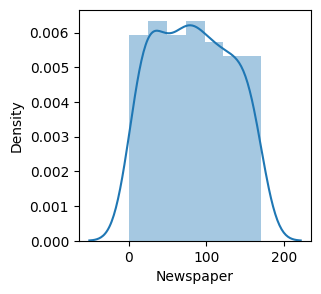

In [79]:
plt.figure(figsize=(3,3))
sns.distplot(data['Newspaper'])
plt.show()

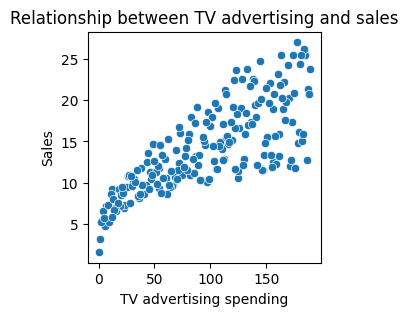

In [80]:
# Scatter plot between 'TV' advertising spending and 'Sales'
plt.figure(figsize=(3,3))
sns.scatterplot(data=data, x='TV',y='Sales')
plt.xlabel('TV advertising spending')
plt.ylabel('Sales')
plt.title('Relationship between TV advertising and sales')
plt.show()


Data Preprocessing

In [54]:
data['TV'].value_counts()

199.8    2
109.8    2
17.2     2
177.0    2
222.4    2
        ..
139.3    1
216.8    1
199.1    1
26.8     1
232.1    1
Name: TV, Length: 190, dtype: int64

LabelEncoder

In [55]:
encoder=LabelEncoder()


In [56]:
data['TV']=encoder.fit_transform(data['TV'])
data['Newspaper']=encoder.fit_transform(data['Newspaper'])
data['Radio']=encoder.fit_transform(data['Radio'])

In [57]:
data.head()

,TV,Radio,Newspaper,Sales
0,153,131,159,22.1
1,32,136,124,10.4
2,12,156,160,9.3
3,98,142,149,18.5
4,112,41,148,12.9


from matplotlib import pyplot as plt
_df_0['TV'].plot(kind='hist', bins=20, title='TV')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Radio'].plot(kind='hist', bins=20, title='Radio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Newspaper'].plot(kind='hist', bins=20, title='Newspaper')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='TV', y='Radio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Radio', y='Newspaper', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Newspaper', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['TV'].plot(kind='line', figsize=(8, 4), title='TV')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Radio'].plot(kind='line', figsize=(8, 4), title='Radio')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Newspaper'].plot(kind='line', figsize=(8, 4), title='Newspaper')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

Spliting Features and Target

In [61]:
z=data.drop(columns='Sales',axis=1)
Y=data['Sales']
print(z)

      TV  Radio  Newspaper
0    153    131        159
1     32    136        124
2     12    156        160
3     98    142        149
4    112     41        148
..   ...    ...        ...
195   28     18         44
196   63     21         23
197  111     35         20
198  181    145        158
199  154     34         27

[200 rows x 3 columns]


In [62]:
print(Y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


Splitting the data into Training and Testing Data

In [63]:
z_train, z_test,Y_train,Y_test=train_test_split(z,Y,test_size=0.2,random_state=2)

In [64]:
print(z.shape,z_train.shape,z_test.shape)

(200, 3) (160, 3) (40, 3)


Machine Learning Model Training

XGBoost Regressor

In [65]:
regressor=XGBRegressor()


In [66]:
regressor.fit(z_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evalution

In [67]:
#prediction on training data
training_data_prediction=regressor.predict(z_train)

In [68]:
#R squared Valued
r2_train=metrics.r2_score(Y_train,training_data_prediction)

In [69]:
print('R Squared value=',r2_train)


R Squared value= 0.9999999295553631


In [72]:
#prediction on test data
test_data_prediction=regressor.predict(z_test)

In [74]:
#R squared Valued
r2_test=metrics.r2_score(Y_test,test_data_prediction)

In [75]:
print(r2_test)

0.9549568356105793
